In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Import Data CSV
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [2]:
# Melihat beberapa baris pertama dari dataset
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
# Melihat informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# Pra-pemrosesan data
data['gender'] = data['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2})
data['smoking_history'] = data['smoking_history'].replace({'No Info': 0, 'never': 1, 'former': 2, 'current': 3, 'not current': 4, 'ever': 5})

In [5]:
# Memisahkan fitur dan target
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = data['diabetes']

In [6]:
# Normalisasi fitur numerik
scaler = StandardScaler()
X[['age', 'bmi', 'HbA1c_level']] = scaler.fit_transform(X[['age', 'bmi', 'HbA1c_level']])

<ipython-input-6-63605279d8c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age', 'bmi', 'HbA1c_level']] = scaler.fit_transform(X[['age', 'bmi', 'HbA1c_level']])


In [7]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Inisialisasi model Regresi Logistik
model = LogisticRegression()

In [9]:
# Melatih model dengan data training
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

In [11]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9586


In [12]:
# Menghitung precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.8624382207578254


In [13]:
# Menghitung recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.6129976580796253


In [14]:
# Menghitung f1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.7166324435318275


In [15]:
# Membuat array nama metrik dan nilai metrik
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

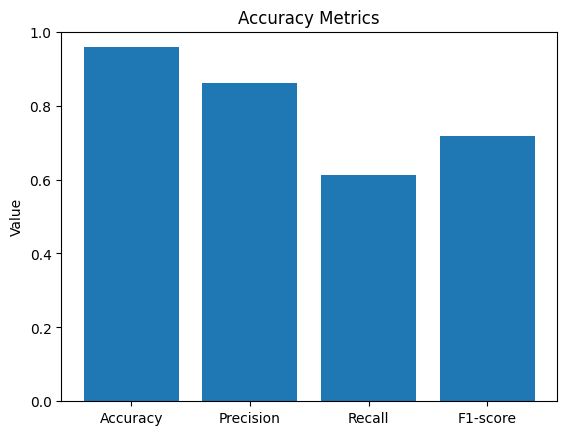

In [16]:
# Membuat grafik batang untuk menampilkan metrik akurasi
plt.bar(metrics, values)
plt.ylim(0, 1)  # Mengatur batas sumbu y antara 0 dan 1
plt.ylabel('Value')
plt.title('Accuracy Metrics')
plt.show()

In [17]:
# Simpan model ke dalam file pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [86]:
# Menampilkan data model
print(model)

LogisticRegression()
